no artificial intelligence was used in this assignment

1. Find a dataset (preferably in manufacturing settings) containing at least three predictors (at least one categorical). Outcome variable must be numerical. Briefly explain what data the dataset includes and how one can benefit from reading your analysis and report. (20%)

    Credit where's credit's due: roomate showed me the who [life expectency dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data). I was searching for a while between google and [kraggle](https://www.kaggle.com/) for various mbta/manufacturing datasets and I couldn't find anything that meets the requirements for three predictors with one of them being categorical. The data was extracted from the archive as a `.xls` file, but `cat`ing the raw contents revealed it was just a common `.csv` instead, so I had to rename the file. 

    This data could be useful to figure out what has or doesn't have an impact on various global mortality statistics; what negative (or positive) factors contirbute to life expectency.
    
    After taking a glance at the columns and the data, `"Life expectancy"` `"Adult Mortality"`, `"infant deaths"`, `"under-five deaths"` become the most obvious values to predict. Some data, especially for GDP may be missing, so these attributes may be dropped entirely, but we'll explore options within data discovery. You'll also notice that the columns should be renamed; we'll create a map (dictionary) for these names and edit that map to drop columns that we won't use. The columns are:

    | column                          | dtype    | type                |
    |:--------------------------------|:---------|:--------------------|
    | Country                         | object   | key                 |
    | Year                            | int64    | key                 |
    | Status                          | object   | categorical_predictor |
    | Life expectancy                 | float64  | possible_outcome |
    | Adult Mortality                 | float64  | possible_outcome |
    | infant deaths                   | int64    | possible_outcome |
    | Alcohol                         | float64  | numerical_predictor |
    | percentage expenditure          | float64  | numerical_predictor |
    | Hepatitis B                     | float64  | numerical_predictor |
    | Measles                         | int64    | numerical_predictor |
    | BMI                             | float64  | numerical_predictor |
    | under-five deaths               | int64    | possible_outcome |
    | Polio                           | float64  | numerical_predictor |
    | Total expenditure               | float64  | numerical_predictor |
    | Diphtheria                      | float64  | numerical_predictor |
    | HIV/AIDS                        | float64  | numerical_predictor |
    | GDP                             | float64  | numerical_predictor |
    | Population                      | float64  | numerical_predictor |
    | thinness  1-19 years            | float64  | numerical_predictor |
    | thinness 5-9 years              | float64  | numerical_predictor |
    | Income composition of resources | float64  | numerical_predictor |
    | Schooling                       | float64  | numerical_predictor |
    
    <br />

    > generated via `pd.DataFrame(...).to_markdown()`







In [289]:
# import cell

import os

import dmba

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import utils

# commented columns are dropped
COLUMN_NAMES = {
    "Country": "country",
    "Year": "year",
    "Status": "status",
    "Life expectancy ": "life_expectancy",
    # "Adult Mortality": "adult_mortality",
    # "infant deaths": "infant_deaths",
    # "Alcohol": "alcohol",
    "percentage expenditure": "percentage_expenditure",
    # "Hepatitis B": "hepatitis_b",
    "Measles ": "measles",
    " BMI ": "bmi",
    # "under-five deaths ": "under_five_deaths",
    "Polio": "polio",
    # "Total expenditure": "total_expenditure",
    "Diphtheria ": "diphtheria",
    " HIV/AIDS": "hiv_aids",
    # "GDP": "gdp",
    # "Population": "population",
    " thinness  1-19 years": "thinness_1_19_years",
    " thinness 5-9 years": "thinness_5_9_years",
    # "Income composition of resources": "income_composition_of_resources",
    # "Schooling": "schooling",
}

life_exp_dataframe = (
    pd.read_csv(os.path.join("data", "Life Expectancy Data.csv"))
    .rename(columns=COLUMN_NAMES)
    .set_index(keys=["country", "year"], drop=True)
)
life_exp_dataframe.head()
# print(life_exp_dataframe.describe())

status  life_expectancy  Adult Mortality  infant deaths  \
country     year                                                                
Afghanistan 2015  Developing             65.0            263.0             62   
            2014  Developing             59.9            271.0             64   
            2013  Developing             59.9            268.0             66   
            2012  Developing             59.5            272.0             69   
            2011  Developing             59.2            275.0             71   

                  Alcohol  percentage_expenditure  Hepatitis B  measles   bmi  \
country     year                                                                
Afghanistan 2015     0.01               71.279624         65.0     1154  19.1   
            2014     0.01               73.523582         62.0      492  18.6   
            2013     0.01               73.219243         64.0      430  18.1   
            2012     0.01               78.184215         67.0     2787  17.6   
            2011     0.01                7.097109         68.0     3013  17.2   

                  under-five deaths   polio  Total expenditure  diphtheria  \
country     year                                                             
Afghanistan 2015                  83    6.0               8.16        65.0   
            2014                  86   58.0               8.18        62.0   
            2013                  89   62.0               8.13        64.0   
            2012                  93   67.0               8.52        67.0   
            2011                  97   68.0               7.87        68.0   

                  hiv_aids         GDP  Population  thinness_1_19_years  \
country     year                                                          
Afghanistan 2015       0.1  584.259210  33736494.0                 17.2   
            2014       0.1  612.696514    327582.0                 17.5   
            2013       0.1  631.744976  31731688.0                 17.7   
            2012       0.1  669.959000   3696958.0                 17.9   
            2011       0.1   63.537231   2978599.0                 18.2   

                  thinness_5_9_years  Income composition of resources  \
country     year                                                        
Afghanistan 2015                17.3                            0.479   
            2014                17.5                            0.476   
            2013                17.7                            0.470   
            2012                18.0                            0.463   
            2011                18.2                            0.454   

                  Schooling  
country     year             
Afghanistan 2015       10.1  
            2014       10.0  
            2013        9.9  
            2012        9.8  
            2011        9.5

2. Explore the data and report/handle any missing/outlier values. Treat categorical variable(s) accordingly. Normalize data if needed. Briefly interpret your findings to the reader. (20%)

In [290]:
for col in life_exp_dataframe.columns:
    print(f"{col}: {life_exp_dataframe[col].isnull().sum()} missing values")

status: 0 missing values
life_expectancy: 10 missing values
Adult Mortality: 10 missing values
infant deaths: 0 missing values
Alcohol: 194 missing values
percentage_expenditure: 0 missing values
Hepatitis B: 553 missing values
measles: 0 missing values
bmi: 34 missing values
under-five deaths : 0 missing values
polio: 19 missing values
Total expenditure: 226 missing values
diphtheria: 19 missing values
hiv_aids: 0 missing values
GDP: 448 missing values
Population: 652 missing values
thinness_1_19_years: 34 missing values
thinness_5_9_years: 34 missing values
Income composition of resources: 167 missing values
Schooling: 163 missing values


In [291]:
life_exp_dataframe.describe()

,life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage_expenditure,Hepatitis B,measles,bmi,under-five deaths,polio,Total expenditure,diphtheria,hiv_aids,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


From this basic summary, we could see that there may be a lot of outliers in:

- measles

We could also see that there a lot of null values in a bunch of different columns, we're gonna drop every column except for a couple -- they're commented out within the map. We're also going to **only** predict life expectency. I know this is fuzzy, but specifically for this dataset, it works well. GDP/Population aren't that useful anyways unless converted to gdp per capita, but that also doesn't tell a full story.

Our categoircal variable here is `status` with the values of "developing" and "developed". We'll use `pd.get_dummies()` to split this. We'll also turn our `country` and `year` columns into the index because it'they're useful to indentify a row, but not useful for calculations.

The following cell will clean up our data and scope, as well as create a normalized version of the dataframe. We could explore just a little more to get a more general idea of what we're gonna do. 

In [292]:
# utils from shared lib

categorical_col = "status"

# i may have to cut down on my one liners
life_exp_dataframe = (
    pd.get_dummies(
        life_exp_dataframe,
        prefix_sep="_",
        dummy_na=False,
        drop_first=True,
        dtype=int,
        columns=[categorical_col],
    )
    .drop(
        columns=[
            col
            for col in life_exp_dataframe.columns
            if col not in COLUMN_NAMES.values()
        ]
    )
    .dropna()
)


life_exp_dataframe_norm = utils.normalize_df(
    life_exp_dataframe,
    *(c for c in COLUMN_NAMES.values() if not c.startswith(categorical_col))
)

print(len(life_exp_dataframe_norm))
life_exp_dataframe.head()

2888


life_expectancy  percentage_expenditure  measles   bmi  \
country     year                                                           
Afghanistan 2015             65.0               71.279624     1154  19.1   
            2014             59.9               73.523582      492  18.6   
            2013             59.9               73.219243      430  18.1   
            2012             59.5               78.184215     2787  17.6   
            2011             59.2                7.097109     3013  17.2   

                  polio  diphtheria  hiv_aids  thinness_1_19_years  \
country     year                                                     
Afghanistan 2015    6.0        65.0       0.1                 17.2   
            2014   58.0        62.0       0.1                 17.5   
            2013   62.0        64.0       0.1                 17.7   
            2012   67.0        67.0       0.1                 17.9   
            2011   68.0        68.0       0.1                 18.2   

                  thinness_5_9_years  status_Developing  
country     year                                         
Afghanistan 2015                17.3                  1  
            2014                17.5                  1  
            2013                17.7                  1  
            2012                18.0                  1  
            2011                18.2                  1

In [293]:
life_exp_dataframe_norm.head()

status_Developing  life_expectancy  percentage_expenditure  \
country     year                                                               
Afghanistan 2015                  1        -0.458049               -0.338575   
            2014                  1        -0.995149               -0.337455   
            2013                  1        -0.995149               -0.337607   
            2012                  1        -1.037274               -0.335128   
            2011                  1        -1.068868               -0.370617   

                   measles       bmi     polio  diphtheria  hiv_aids  \
country     year                                                       
Afghanistan 2015 -0.111450 -0.957844 -3.285901   -0.737356 -0.322442   
            2014 -0.168710 -0.982891 -1.057361   -0.864212 -0.322442   
            2013 -0.174073 -1.007938 -0.885935   -0.779642 -0.322442   
            2012  0.029796 -1.032984 -0.671652   -0.652786 -0.322442   
            2011  0.049344 -1.053022 -0.628795   -0.610501 -0.322442   

                  thinness_1_19_years  thinness_5_9_years  
country     year                                           
Afghanistan 2015             2.793098            2.753331  
            2014             2.860950            2.797673  
            2013             2.906184            2.842015  
            2012             2.951419            2.908528  
            2011             3.019270            2.952870

3. Fit a "Multiple Linear Regression" model to your training and validation data. Briefly explain the outputs including two statistics of your choice (ME, ...). (20%)


    Based on the coefficents listed from `LinearRegression(...).coef_`, the most independent variable with the most positive impact upon life expectancy is `BMI`, which mirrors the prior heat chart. This is probably because a higher BMI correlates to both more wealth and a fuller diet. Of course, if BMI is too high, then life expectancy will decrease (think of Nauru).

    The numerical variable with the most negative impact on life expectancy is `hvi_aids`, which also makes sense because the aids epidemic in Africa was more prevelent within the timeframe that the dataset was created. Surprisingly, this positive change was kinda kickstarted by George W. Bush of all people...? Anyways, I believe that this attachment may explain everything; in South Africa, which used to be by far the richest country south of the Sahara, Life expetancy decreased by 25% just because of AIDs. AIDs has the power to end lives early.

    ![image.png](https://southafrica-info.com/wp-content/uploads/2018/02/South_Africa_life_expectancy_1960-2016-new.jpg)

    Whether the country was developing was the biggest influence, however. This is kind of obvious, and it's helped because it's just a boolean variable.

    ### error analysis

    - `Mean Error (ME)`: The average of errors between predicted and actual values (from slides); since my values are close to zero, it suggests that my predictions of life expectency aren't consistently over/under estimated.

    - ` Mean Absolute Error (MAE)`: The average magnitude of prediction errors. Unlike `RMSE`, `MAE` isn't very sensitive to outliers. I'd like to posit that since my `RMSE` and `MAE` are very close, I don't think there are many outliers in my data. The low `MAE` indiciates that my preditor's performance was pretty good.



In [294]:
# 3. Fit a "Multiple Linear Regression" model to your training and validation data. Briefly explain the outputs including two statistics of your choice (ME, ...). (20%)

outcome = "life_expectancy"

predictors = [col for col in life_exp_dataframe.columns if col != outcome]

df_list: list[pd.DataFrame | pd.Series] = train_test_split(
    life_exp_dataframe_norm[predictors],
    life_exp_dataframe_norm[outcome],
    test_size=0.4,
    random_state=1,
)

train_x, valid_x, train_y, valid_y = df_list
life_exp_model = LinearRegression()
life_exp_model.fit(train_x, train_y)

pd.DataFrame({"predictor": predictors, "coefficent": life_exp_model.coef_})

,predictor,coefficent
0,percentage_expenditure,0.132923
1,measles,-0.021404
2,bmi,0.259444
3,polio,0.155083
4,diphtheria,0.155825
5,hiv_aids,-0.406546
6,thinness_1_19_years,-0.095888
7,thinness_5_9_years,0.019079
8,status_Developing,-0.474236


In [295]:
dmba.regressionSummary(train_y, life_exp_model.predict(train_x))
print(f"\nintercept: {life_exp_model.intercept_}")
car_lm_pred = life_exp_model.predict(valid_x)
pd.DataFrame(
    {
        "Predicted": car_lm_pred,
        "Actual": valid_y,
        "Residual": valid_y - car_lm_pred,
    }
).head(20)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5586
            Mean Absolute Error (MAE) : 0.4345
          Mean Percentage Error (MPE) : 18.2558
Mean Absolute Percentage Error (MAPE) : 137.0093

intercept: 0.3746698391303409


,,Predicted,Actual,Residual
country,year,,,
Nicaragua,2014,0.476143,0.542431,0.066289
Djibouti,2010,-0.259037,-0.847710,-0.588673
Congo,2003,-2.116635,-1.700751,0.415885
Ukraine,2004,0.414346,-0.205296,-0.619642
Bhutan,2002,-0.477991,-0.721333,-0.243342
Armenia,2001,0.328306,0.342335,0.014029
Liberia,2000,-1.223887,-1.837658,-0.613771
Yemen,2008,-0.263547,-0.584425,-0.320879
Panama,2010,0.480896,0.753059,0.272163


In [296]:
dmba.regressionSummary(valid_y, car_lm_pred)


Regression statistics

                      Mean Error (ME) : 0.0387
       Root Mean Squared Error (RMSE) : 0.5616
            Mean Absolute Error (MAE) : 0.4375
          Mean Percentage Error (MPE) : 9.6408
Mean Absolute Percentage Error (MAPE) : 163.7605


4. Use one plot of any type (which makes a good sense to the reader) to convey more/useful information to the reader. Briefly interpret the plot(s). (20%)

    Because we have a buncha different variables here, that we want to test the predictor against, so I believe a heatmap is the best choice here. I used the raw data because reating a heatmap for normalized data doesn't really make sense.
    
    The blue values indicate a positive correlation > 0 and the red values indicate a negative correlation < 0. A lot of this makes sense: life expectancy is possitivly correlated with expenditure on Expenditure on health and BMI, while a lot of diseases (and skinniness) are negativly correlated. Developed countries have a higher life expectency. Polio and diphtheria are positivly correlated with life expentency though. I don't know enough about diphtheria, but the positive correlation with polio may be because of the antivaxxer movement.



Text(0.5, 1.0, 'corralation and effect of various health statistics on each other')

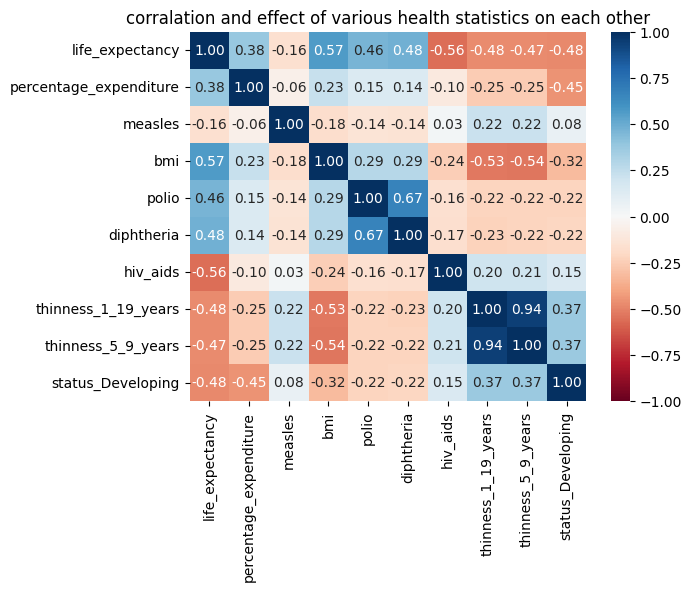

In [297]:
corr = life_exp_dataframe.corr()

ax_heatmap = sns.heatmap(
    corr,
    xticklabels=corr.columns.to_list(),  # mypy complains without `to_list()`
    yticklabels=corr.columns.to_list(),
    cmap="RdBu",
    vmin=-1,
    vmax=1,  # i don't think u need these
    annot=True,
    fmt=".2f",  # by default
    center=0,
)

ax_heatmap.set_title(
    "corralation and effect of various health statistics on each other"
)

5. Do a PCA analysis to potentially reduce the dimension in your dataset. Briefly interpret the results (20%).

    Using normalized components, the first six components would be okay to keep, but the other ones past ~92%-ish don't matter that much.

In [298]:
# Do a PCA analysis to potentially reduce the dimension in your dataset. Briefly interpret the results (20%).

pcs = PCA()
pcs.fit(life_exp_dataframe_norm)
pcs_summary_df = pd.DataFrame(
    {
        "Standard deviation": np.sqrt(pcs.explained_variance_),
        "Proportion of variance": pcs.explained_variance_ratio_,
        "Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_),
    }
)
pcs_summary_df = pcs_summary_df.transpose()
pcs_summary_df.columns = [
    "PC{}".format(i) for i in range(1, len(pcs_summary_df.columns) + 1)
]
pcs_summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Standard deviation,1.9112,1.1753,1.0350,0.9545,0.9182,0.7460,0.5764,0.4956,0.3019,0.2469
Proportion of variance,0.3994,0.1510,0.1171,0.0996,0.0922,0.0609,0.0363,0.0269,0.0100,0.0067
Cumulative proportion,0.3994,0.5504,0.6676,0.7672,0.8593,0.9202,0.9565,0.9834,0.9933,1.0000


In [299]:
pd.DataFrame(
    pcs.components_,
    columns=pcs_summary_df.columns,
    index=life_exp_dataframe_norm.columns,
)
# pcs_summary_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
status_Developing,-0.099871,0.435543,0.226237,-0.161551,0.380671,0.301956,0.304941,-0.240337,-0.410166,-0.409844
life_expectancy,0.017652,0.161772,-0.060326,0.091768,-0.133683,0.534834,0.534475,-0.131103,0.419464,0.422775
percentage_expenditure,0.043221,-0.288198,-0.240825,-0.562256,-0.025838,0.249861,0.246889,0.621284,-0.126506,-0.122049
measles,-0.113093,-0.060989,0.773229,0.324339,-0.046904,0.081589,0.067119,0.516458,0.012837,0.012509
bmi,0.044006,-0.131724,-0.465080,0.737456,0.101122,0.162440,0.155656,0.202510,-0.242385,-0.244886
polio,0.008633,0.096123,-0.090746,0.003194,0.864455,-0.095451,-0.109206,0.241174,0.284544,0.273844
diphtheria,0.005173,-0.064479,0.013928,-0.006994,0.014961,0.715334,-0.693844,-0.044211,0.006469,-0.015210
hiv_aids,-0.180741,0.791139,-0.231813,0.009012,-0.275158,-0.079671,-0.194535,0.406778,0.009296,0.046421
thinness_1_19_years,0.969679,0.200364,0.103985,0.012823,-0.026199,-0.005352,-0.020219,0.074790,-0.038872,-0.019294
thinness_5_9_years,-0.008643,-0.023634,0.004381,0.002478,0.014840,0.010613,-0.007888,-0.011692,-0.705897,0.707473
